In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(palette='bright')

In [8]:
df = pd.DataFrame(data={
    'MODE': [],
    'n': [],
    'p': [],
    't': [],
    'TIME': [],
})

for MODE in os.listdir('data'):
    for n in os.listdir(f'data/{MODE}'):
        for p in os.listdir(f'data/{MODE}/{n}'):
            if MODE == 'openmp':
                for t in os.listdir(f'data/{MODE}/{n}/{p}'):
                    with open(f'data/{MODE}/{n}/{p}/{t}') as f:
                        df.loc[len(df)] = [MODE, int(n), int(p), int(t), float(f.read().strip())]
            else:
                with open(f'data/{MODE}/{n}/{p}') as f:
                    df.loc[len(df)] = [MODE, int(n), int(p), None, float(f.read().strip())]

df.head()

,MODE,n,p,t,TIME
0,opencl,100.0,1.0,None,0.106493
1,opencl,100.0,2.0,None,0.126432
2,opencl,100.0,3.0,None,0.141781
3,opencl,100.0,4.0,None,0.170438
4,opencl,1000.0,1.0,None,0.196359


# Times

## Serial

In [65]:
(
    df[df['MODE'] == 'serial']
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.005290,0.002691,0.002248,0.001634
300.0,0.145741,0.072840,0.049654,0.040918
500.0,0.685994,0.348715,0.240163,0.183144
700.0,1.886160,0.969372,0.689017,0.570747
900.0,4.127590,2.219490,1.651440,1.303880
1000.0,5.706610,3.228100,2.348420,1.865010
1200.0,10.252400,5.645860,3.850210,2.917200
1500.0,28.472500,16.660000,11.428700,8.419300
1700.0,56.363600,29.159800,19.925900,14.616300


## OpenCL

In [64]:
(
    df[df['MODE'] == 'opencl']
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.106493,0.126432,0.141781,0.170438
300.0,0.104662,0.133495,0.130614,0.152950
500.0,0.110649,0.135766,0.134179,0.155669
700.0,0.123316,0.160749,0.171929,0.186407
900.0,0.160174,0.151990,0.192851,0.187606
1000.0,0.196359,0.189823,0.219769,0.239733
1200.0,0.216624,0.299049,0.346490,0.324493
1500.0,0.521713,0.638385,0.725341,0.815819
1700.0,1.308600,1.415080,1.474470,1.484070


## OpenMP

### 2 Threads

In [88]:
(
    df[(df['MODE'] == 'openmp') & (df['t'] == 2)][['n', 'p', 'TIME']]
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.005219,0.013657,0.036126,0.034845
300.0,0.050839,0.088926,0.084388,0.090685
500.0,0.217056,0.271035,0.284743,0.279989
700.0,0.585655,0.649675,0.679222,0.678594
900.0,1.221680,1.360580,1.444240,1.560490
1000.0,1.740350,2.050060,1.993080,2.206580
1200.0,3.147810,3.283810,3.355600,3.368550
1500.0,9.680710,8.368960,8.770110,8.896930
1700.0,14.758300,14.323000,18.756500,24.296200


### 4 Threads

In [89]:
(
    df[(df['MODE'] == 'openmp') & (df['t'] == 4)][['n', 'p', 'TIME']]
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.008165,0.013934,0.040406,0.029668
300.0,0.050192,0.063651,0.083934,0.119885
500.0,0.207787,0.278371,0.293756,0.268870
700.0,0.571729,0.580518,0.746637,0.661005
900.0,1.246310,1.436650,1.474350,1.575310
1000.0,1.797940,1.944620,1.939340,2.170820
1200.0,2.969910,3.300700,3.303050,3.409440
1500.0,10.424300,10.124600,9.091720,18.554400
1700.0,15.105400,14.400500,15.440400,15.071100


### 8 Threads

In [90]:
(
    df[(df['MODE'] == 'openmp') & (df['t'] == 8)][['n', 'p', 'TIME']]
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.006957,0.004496,0.033974,0.022356
300.0,0.050147,0.079405,0.088953,0.105639
500.0,0.220347,0.305526,0.314734,0.256051
700.0,0.577764,0.724932,0.734019,0.732877
900.0,1.249870,1.477350,1.481660,1.593230
1000.0,1.717430,2.107740,2.071530,2.075700
1200.0,2.939130,3.191320,3.448620,3.346020
1500.0,8.318710,10.693900,8.721120,8.629550
1700.0,22.424500,20.504000,15.734600,15.233200


### Max Threads

In [87]:
(
    df[(df['MODE'] == 'openmp') & (df['t'] == 0)][['n', 'p', 'TIME']]
        .pivot(index='n', columns='p', values='TIME')
)

p,1.0,2.0,3.0,4.0
n,,,,
100.0,0.002277,0.016731,0.020956,0.018381
300.0,0.051410,0.076847,0.073358,0.092556
500.0,0.200954,0.291196,0.316336,0.236679
700.0,0.551692,0.734432,0.653212,0.728684
900.0,1.228750,1.411030,1.580860,1.422400
1000.0,1.480830,1.780400,1.919270,1.907660
1200.0,2.763500,3.033720,3.005060,3.116850
1500.0,7.581210,7.856870,8.089160,8.197980
1700.0,13.128400,12.880900,13.377600,13.543200


# Visualize

## Serial

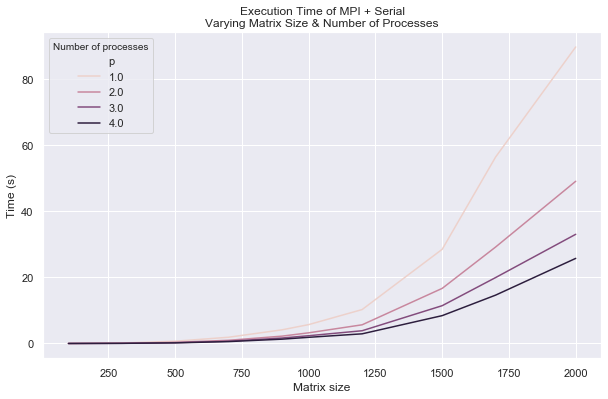

In [38]:
serial_df = df[df['MODE'] == 'serial'][['MODE', 'n', 'p', 'TIME']]

fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=serial_df, x='n', y='TIME', hue='p',
    ax=ax,
)

ax.set_title('Execution Time of MPI + Serial\nVarying Matrix Size & Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Matrix size')
ax.legend(title='Number of processes')

plt.show()

## OpenCL

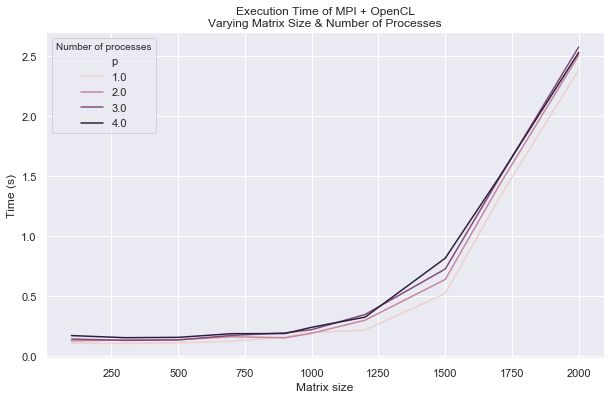

In [39]:
opencl_df = df[df['MODE'] == 'opencl'][['MODE', 'n', 'p', 'TIME']]

fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=opencl_df, x='n', y='TIME', hue='p',
    ax=ax,
)

ax.set_title('Execution Time of MPI + OpenCL\nVarying Matrix Size & Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Matrix size')
ax.legend(title='Number of processes')

plt.show()

## OpenMP (Max Threads)

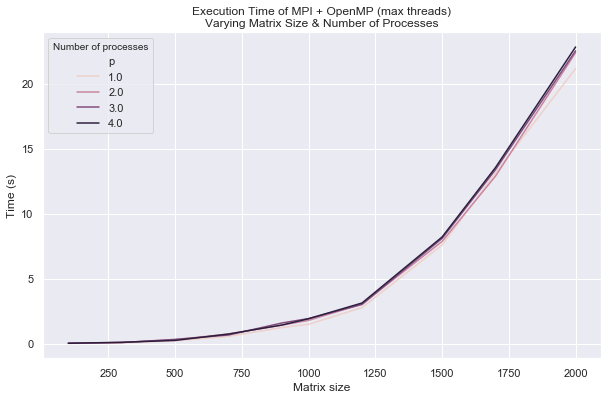

In [44]:
openmp_df = df[(df['MODE'] == 'openmp') & (df['t'] == 0)][['MODE', 'n', 'p', 'TIME']]

fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=openmp_df, x='n', y='TIME', hue='p',
    ax=ax,
)

ax.set_title('Execution Time of MPI + OpenMP (Max Threads)\nVarying Matrix Size & Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Matrix size')
ax.legend(title='Number of processes')

plt.show()

## All

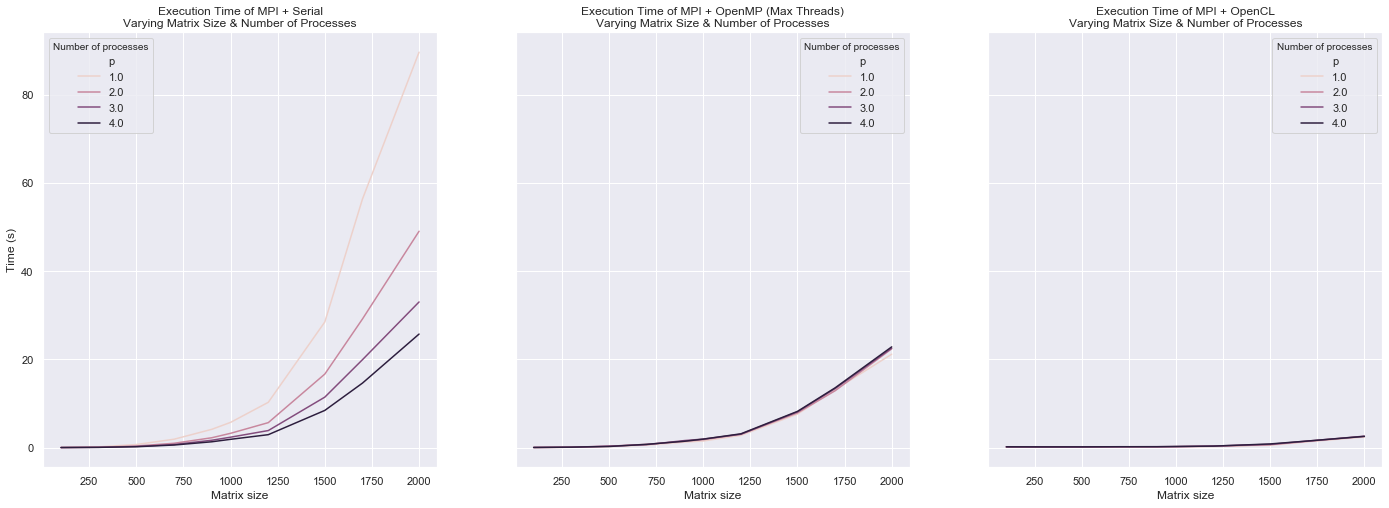

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[24, 8], sharey=True)

sns.lineplot(
    data=serial_df, x='n', y='TIME', hue='p',
    ax=ax1,
)

ax1.set_title('Execution Time of MPI + Serial\nVarying Matrix Size & Number of Processes')
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('Matrix size')
ax1.legend(title='Number of processes')

sns.lineplot(
    data=openmp_df, x='n', y='TIME', hue='p',
    ax=ax2,
)

ax2.set_title('Execution Time of MPI + OpenMP (Max Threads)\nVarying Matrix Size & Number of Processes')
ax2.set_ylabel('Time (s)')
ax2.set_xlabel('Matrix size')
ax2.legend(title='Number of processes')

sns.lineplot(
    data=opencl_df, x='n', y='TIME', hue='p',
    ax=ax3,
)

ax3.set_title('Execution Time of MPI + OpenCL\nVarying Matrix Size & Number of Processes')
ax3.set_ylabel('Time (s)')
ax3.set_xlabel('Matrix size')
ax3.legend(title='Number of processes')

plt.show()

## Threads

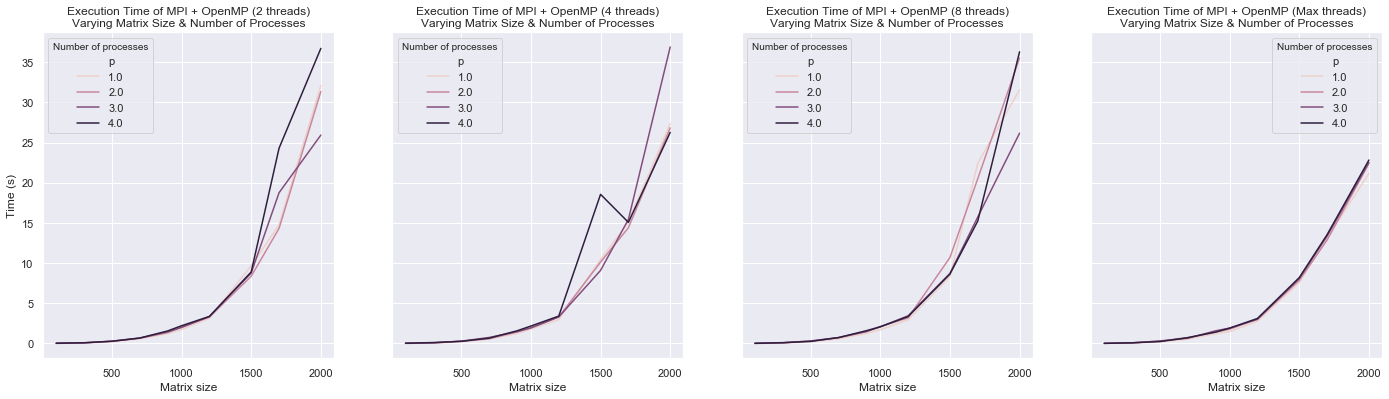

In [108]:
ts = [2, 4, 8, 0]

fig, ax = plt.subplots(1, len(ts), figsize=[24, 6], sharey=True)

for i in range(len(ts)):
    sns.lineplot(
        data=df[(df['MODE'] == 'openmp') & (df['t'] == ts[i])][['MODE', 'n', 'p', 'TIME']], x='n', y='TIME', hue='p',
        ax=ax[i],
    )
    n = 'Max' if ts[i] == 0 else ts[i]
    ax[i].set_title(f'Execution Time of MPI + OpenMP ({n} threads)\nVarying Matrix Size & Number of Processes')
    ax[i].set_ylabel('Time (s)')
    ax[i].set_xlabel('Matrix size')
    ax[i].legend(title='Number of processes')

plt.show()